Movies for Microsoft

Data Aquisition 
Data Cleaning 
Data Review 
Present Findings 

In [3]:
#importing necessary libraries for data cleaning/analysis/visualization 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"},) # set plot style

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
#read in data from csv file provided by Evgeniya's API webscrape 
Evg_data = pd.read_csv('final_movie_data.csv')


In [5]:
Evg_data.shape

(5390, 14)

In [285]:
# Show the top 5 rows of data
Evg_data.head()

,Unnamed: 0,title,budget,revenue,genres,production_countries,production_companies,adult,popularity,original_language,release_date,runtime,vote_average,vote_count
0,0,Independence Day,75000000,817400891,"Action, Adventure, Science Fiction",United States of America,"Centropolis Entertainment, 20th Century Fox",False,17.068,en,1996-06-25,145.0,6.8,5595
1,1,The Matrix,63000000,463517383,"Action, Science Fiction","Australia, United States of America","Village Roadshow Pictures, Groucho II Film Par...",False,35.721,en,1999-03-30,136.0,8.1,14757
2,2,The Matrix Reloaded,150000000,738599701,"Adventure, Action, Thriller, Science Fiction","Australia, United States of America","Heineken Branded Entertainment, Village Roadsh...",False,24.442,en,2003-05-15,138.0,6.9,5852
3,3,The Matrix Revolutions,150000000,424988211,"Adventure, Action, Thriller, Science Fiction","United States of America, Australia","Silver Pictures, Village Roadshow Pictures, NP...",False,22.937,en,2003-11-05,129.0,6.6,5261
4,4,Out of Africa,31000000,128499205,"History, Romance, Drama",United States of America,"Universal Pictures, Mirage Entertainment",False,11.758,en,1985-12-20,161.0,7.3,608


In [7]:
# check if there is NaN value in each column
# The any() method returns True if any element of an iterable is True. If not, any() returns False.
# w/out .any() the df would display with rows and colums containing True/False values
Evg_data.isna().any()

Unnamed: 0              False
title                   False
budget                  False
revenue                 False
genres                   True
production_countries     True
production_companies     True
adult                   False
popularity              False
original_language       False
release_date             True
runtime                  True
vote_average            False
vote_count              False
dtype: bool

In [8]:
# Check the number of NaN values in each column
# .isna() returns row/column df with True/False values .sum() returns the number of True values per column 
Evg_data.isna().sum()

Unnamed: 0                0
title                     0
budget                    0
revenue                   0
genres                  180
production_countries    289
production_companies    450
adult                     0
popularity                0
original_language         0
release_date            117
runtime                 118
vote_average              0
vote_count                0
dtype: int64

In [9]:
#'production_companies' and 'productin_countries' may need to be dropped 

In [10]:
#dropped_columns = 

In [11]:
# Check the number of 0 values in each feature
# this is important when identifying which rows need to be removed for relevant columns such as budget and revenue
Evg_data.eq(0).any()

Unnamed: 0               True
title                   False
budget                  False
revenue                 False
genres                  False
production_countries    False
production_companies    False
adult                    True
popularity              False
original_language       False
release_date            False
runtime                 False
vote_average             True
vote_count               True
dtype: bool

In [12]:
# first we must focus on movies where revenue and budget data with 0 values being present 

In [13]:
#find values in budget and revenue column that are not equal to zero and sets new df to vew variable name 
# Insteasd of removing the rows with zeros I created a new df that contains everything but the rows with zeros 
movie_df = Evg_data[(Evg_data.budget != 0) & (Evg_data.revenue != 0)]
movie_df.head()

,Unnamed: 0,title,budget,revenue,genres,production_countries,production_companies,adult,popularity,original_language,release_date,runtime,vote_average,vote_count
0,0,Independence Day,75000000,817400891,"Action, Adventure, Science Fiction",United States of America,"Centropolis Entertainment, 20th Century Fox",False,17.068,en,1996-06-25,145.0,6.8,5595
1,1,The Matrix,63000000,463517383,"Action, Science Fiction","Australia, United States of America","Village Roadshow Pictures, Groucho II Film Par...",False,35.721,en,1999-03-30,136.0,8.1,14757
2,2,The Matrix Reloaded,150000000,738599701,"Adventure, Action, Thriller, Science Fiction","Australia, United States of America","Heineken Branded Entertainment, Village Roadsh...",False,24.442,en,2003-05-15,138.0,6.9,5852
3,3,The Matrix Revolutions,150000000,424988211,"Adventure, Action, Thriller, Science Fiction","United States of America, Australia","Silver Pictures, Village Roadshow Pictures, NP...",False,22.937,en,2003-11-05,129.0,6.6,5261
4,4,Out of Africa,31000000,128499205,"History, Romance, Drama",United States of America,"Universal Pictures, Mirage Entertainment",False,11.758,en,1985-12-20,161.0,7.3,608


In [14]:
movie_df.shape

(5390, 14)

In [15]:
#here anywhere there is a NaN value we will set the value to 0
movie_df.fillna(0, inplace=True)

In [16]:
movie_df.eq(0).any() # note that budget and revenue no longer have 0 values

Unnamed: 0               True
title                   False
budget                  False
revenue                 False
genres                   True
production_countries     True
production_companies     True
adult                    True
popularity              False
original_language       False
release_date             True
runtime                  True
vote_average             True
vote_count               True
dtype: bool

In [17]:
# in order to answer the question "Which genres are more popular and profitable" we need to 
# create new df that omits any row that had a 0 value for genre 

In [18]:
new_movie_df = movie_df[movie_df.genres != 0]

In [19]:
new_movie_df.eq(0).any() #genres no longes has missing values

Unnamed: 0               True
title                   False
budget                  False
revenue                 False
genres                  False
production_countries     True
production_companies     True
adult                    True
popularity              False
original_language       False
release_date             True
runtime                  True
vote_average             True
vote_count               True
dtype: bool

In [20]:
#new_movie_df.shape

In [21]:
# There are multiple genre types for a movie this selects the first movie genre label and adds it to a seperate list

genre = []
for movie in new_movie_df['genres']:
    genre.append(movie)


Genre_0 = [x.split(', ') for x in genre if x is not np.nan]

Genre_1 = []
for item in Genre_0:
    Genre_1.append(item[0])


In [22]:
Genre_1 #list of movie genres per movie

['Action',
 'Action',
 'Adventure',
 'Adventure',
 'History',
 'Action',
 'Action',
 'Horror',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Mystery',
 'Drama',
 'Thriller',
 'Comedy',
 'Romance',
 'Horror',
 'Comedy',
 'Drama',
 'Drama',
 'Horror',
 'Drama',
 'Adventure',
 'Comedy',
 'Horror',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Crime',
 'Western',
 'Drama',
 'Adventure',
 'Crime',
 'Comedy',
 'Adventure',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Adventure',
 'Horror',
 'Action',
 'Adventure',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Adventure',
 'Adventure',
 'Adventure',
 'Adventure',
 'Adventure',
 'History',
 'Action',
 'Thriller',
 'Adventure',
 'Adventure',
 'Drama',
 'Drama',
 'Drama',
 'Adventure',
 'Comedy',
 'Comedy',
 'Horror',
 'Action',
 'Adventure',
 'Adventure',
 'Comedy',
 'Comedy',
 'Drama',
 'Adventure',
 'Action',
 'Adventure',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Adventure',
 'Action',
 'Mystery',
 'Drama',
 'Horror',
 'Action',


In [23]:
new_movie_df['Main_Genre'] = Genre_1 # adds new column to database

In [24]:
new_movie_df['release_date'] = pd.to_datetime(new_movie_df['release_date'])
new_movie_df.sort_values('release_date')

,Unnamed: 0,title,budget,revenue,genres,production_countries,production_companies,adult,popularity,original_language,release_date,runtime,vote_average,vote_count,Main_Genre
1814,606,Neptune's Daughter,3500050000,1000000,Fantasy,United States of America,Universal Film Manufacturing Company,False,0.600,en,1914-04-14,70.0,0.0,0,Fantasy
1720,486,The Rose of the Rancho,16988,87028,"Romance, Western, Adventure",United States of America,Jesse L. Lasky Feature Play Company,False,0.627,en,1914-11-15,50.0,0.0,0,Romance
5266,212,The Girl of the Golden West,15110,102224,"Western, Romance",United States of America,Jesse L. Lasky Feature Play Company,False,0.600,en,1915-01-04,50.0,5.5,2,Western
13,14,The Birth of a Nation,100000,11000000,"Drama, History, War",United States of America,Epoch Film Co.,False,9.468,en,1915-02-08,193.0,6.5,221,Drama
5136,2694,The Cheat,17311,137365,Drama,United States of America,Jesse L. Lasky Feature Play Company,False,1.892,en,1915-12-13,59.0,5.5,18,Drama
3539,182,Temptation,22472,102437,"Drama, Romance",United States of America,Jesse L. Lasky Feature Play Company,False,0.655,en,1915-12-15,60.0,0.0,0,Drama
1521,72,A Daughter of the Gods,1000000,1390000,"Fantasy, Drama",United States of America,Fox Film Corporation,False,0.600,en,1916-10-16,180.0,5.0,1,Fantasy
873,629,"20,000 Leagues Under the Sea",200000,8000000,"Adventure, Drama, Action, Science Fiction","Bahamas, United States of America",The Universal Film Mfg. Co.,False,3.256,en,1916-12-24,105.0,6.0,13,Adventure
1025,228,Mickey,250000,8000000,"Comedy, Drama",United States of America,Mabel Normand Feature Film Company,False,1.759,en,1918-08-01,93.0,7.1,7,Comedy
3538,179,Over the Hill to the Poorhouse,100000,3000000,"Drama, Crime",United States of America,Fox Film Corporation,False,0.600,en,1920-09-17,110.0,0.0,0,Drama


In [25]:
# count the number of each genre and presents it in a list 
genre_amount = new_movie_df['Main_Genre'].value_counts()
genre_amount

Drama              1305
Comedy             1071
Action              904
Adventure           352
Horror              323
Crime               256
Thriller            204
Romance             141
Animation           134
Fantasy             105
Documentary          85
Science Fiction      85
Mystery              57
Family               47
Music                42
History              39
Western              29
War                  28
TV Movie              3
Name: Main_Genre, dtype: int64

In [26]:
# Place genre_amount data into a seperate dataframe in order to prodce a plot 
genre_df = pd.DataFrame(genre_amount, columns=['Main_Genre'])
genre_df['Genre'] = genre_df.index # Make new column with genre data
genre_df

,Main_Genre,Genre
Drama,1305,Drama
Comedy,1071,Comedy
Action,904,Action
Adventure,352,Adventure
Horror,323,Horror
Crime,256,Crime
Thriller,204,Thriller
Romance,141,Romance
Animation,134,Animation
Fantasy,105,Fantasy


In [27]:
Genre_df = genre_df.rename(columns={"Main_Genre": "Num_Per_Genre"}) #rename df columns and set = to new df 

In [28]:
Genre_df

,Num_Per_Genre,Genre
Drama,1305,Drama
Comedy,1071,Comedy
Action,904,Action
Adventure,352,Adventure
Horror,323,Horror
Crime,256,Crime
Thriller,204,Thriller
Romance,141,Romance
Animation,134,Animation
Fantasy,105,Fantasy


Text(0.5, 1.0, 'Number of Movies per Genre')

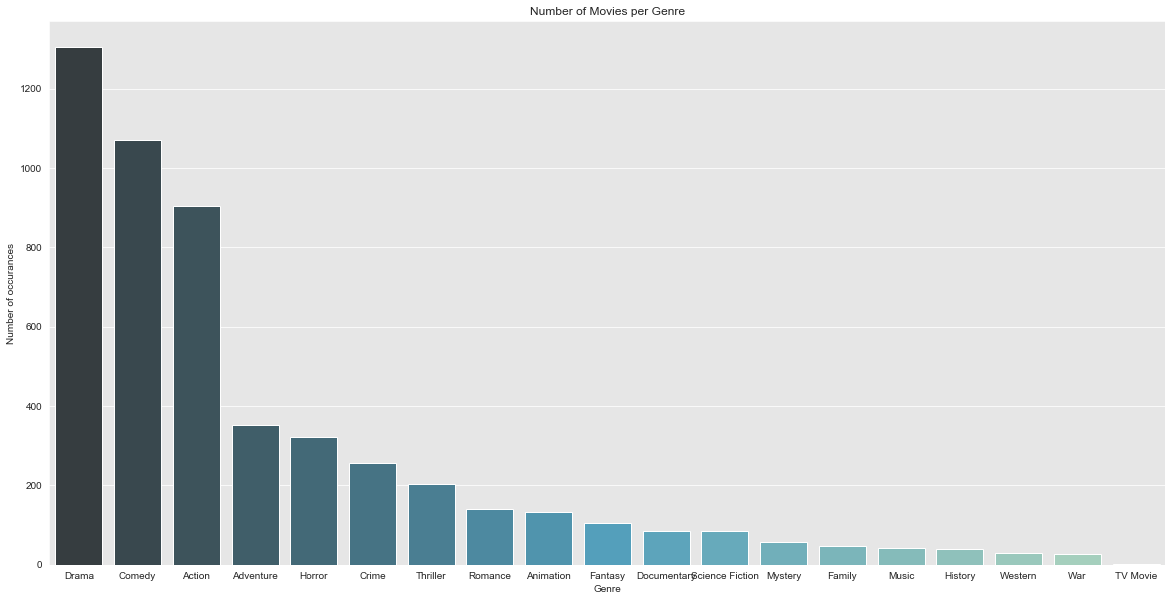

In [29]:
# plot the number of occurance of each genre from dataset
plt.figure(figsize=[20,10])
sns.barplot(data=Genre_df.sort_values(by='Num_Per_Genre', ascending=False), x='Genre', y='Num_Per_Genre',palette="GnBu_d")
plt.xlabel('Genre')
plt.ylabel('Number of occurances')
plt.title('Number of Movies per Genre')

In [ ]:
change revenue to millions by dividing by e^6 
also chage popularity 

In [30]:
#calculate the poularity of each genre by catagory 

In [31]:
genre_pop = list(Genre_df.Genre)
genre_pop

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Horror',
 'Crime',
 'Thriller',
 'Romance',
 'Animation',
 'Fantasy',
 'Documentary',
 'Science Fiction',
 'Mystery',
 'Family',
 'Music',
 'History',
 'Western',
 'War',
 'TV Movie']

In [32]:
# split the genres which a movie belong to from combined value into single genre value 
genres_per_id = new_movie_df.Main_Genre.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

In [33]:
# Calculate the total popularity for each genre
genre_popularity = np.matrix(new_movie_df.popularity) * np.matrix(genres_per_id)

In [34]:
# Get the popularity as a list
genre_popu_list = genre_popularity.tolist()[0]

In [35]:
# Create a data frame with genre and corresponding popularity
Genre_popularity = pd.DataFrame(
    {'genre': genre_pop,
        'popularity': genre_popu_list})

In [36]:
Genre_popularity

,genre,popularity
0,Drama,9233.361
1,Comedy,4189.108
2,Action,271.484
3,Adventure,3033.336
4,Horror,9416.316
5,Crime,489.465
6,Thriller,1780.916
7,Romance,7952.196
8,Animation,932.538
9,Fantasy,2283.035


Text(0.5, 1.0, 'The Popularity of each genre in dataset')

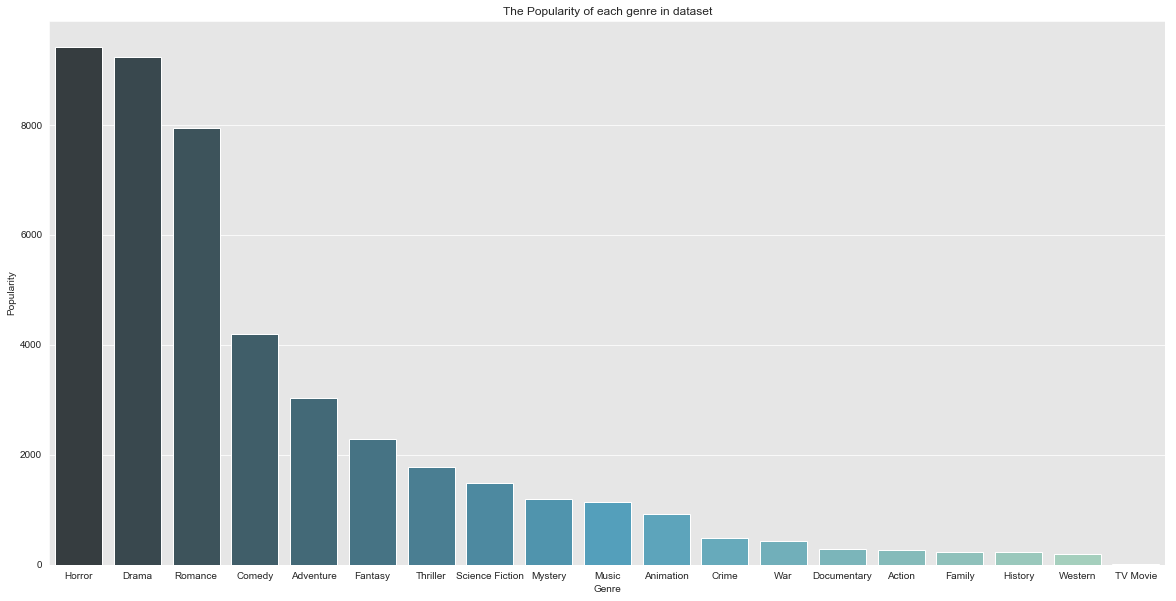

In [37]:
# Plot the The Popularity of each genre in dataset
plt.figure(figsize=[20,10])
sns.barplot(data=Genre_popularity.sort_values(by='popularity', ascending=False), x='genre', y='popularity',palette="GnBu_d")
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('The Popularity of each genre in dataset')

In [38]:
# Calculate the revenue for each genre
Genre_revenue = np.matrix(new_movie_df.revenue) * np.matrix(genres_per_id)

# Get revenue data
Genre_revenue_list = Genre_revenue.tolist()[0]

In [39]:
# Create a data frame with genres and revenues
Genre_rev = pd.DataFrame(
    {'genre': genre_pop,
        'revenue': Genre_revenue_list})

Text(0.5, 1.0, 'The Revenue of each genre in TMDB data')

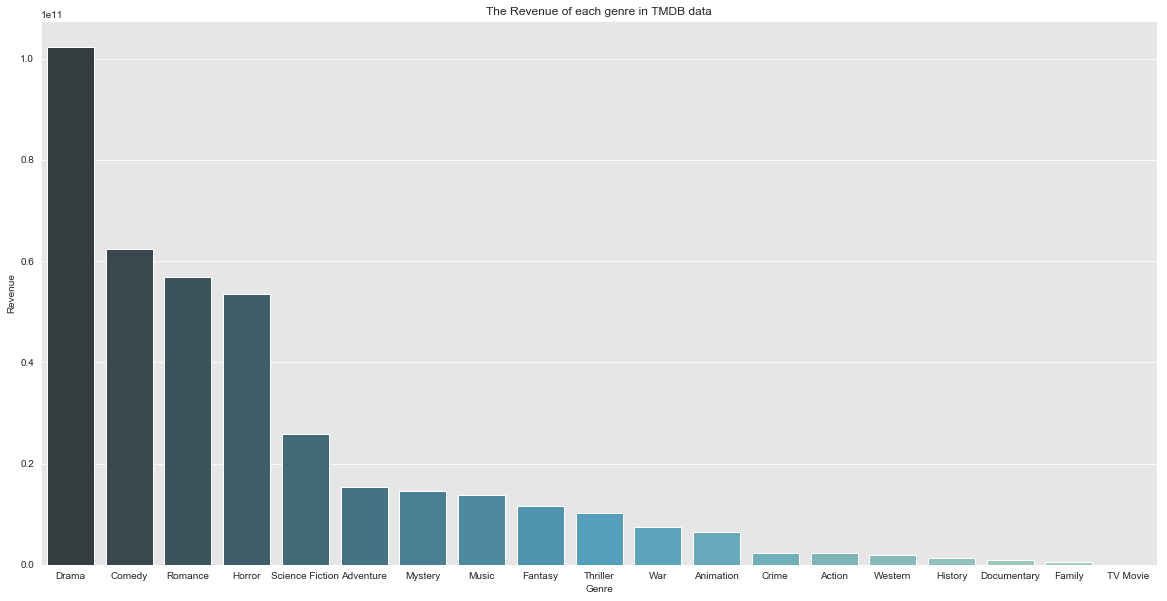

In [40]:
# plot the Revenue of each genre in dataset
plt.figure(figsize=[20,10])
sns.barplot(data=Genre_rev.sort_values(by='revenue', ascending=False), x='genre', y='revenue',palette="GnBu_d")
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('The Revenue of each genre in TMDB data')

In [41]:
#we need calculate the ROI for each genre 
Genre_budget = np.matrix(new_movie_df.budget) * np.matrix(genres_per_id)

In [42]:
# Get the overall ROI for each genre
genre_roi_list = ((((Genre_revenue)/(Genre_budget))-1)*100).tolist()[0]

# Create a data frame of genre and ROI
genre_roi = pd.DataFrame(
    {'genre': genre_pop,
        'ROI': genre_roi_list})

Text(0.5, 1.0, 'The Overall ROI of each genre in dataset')

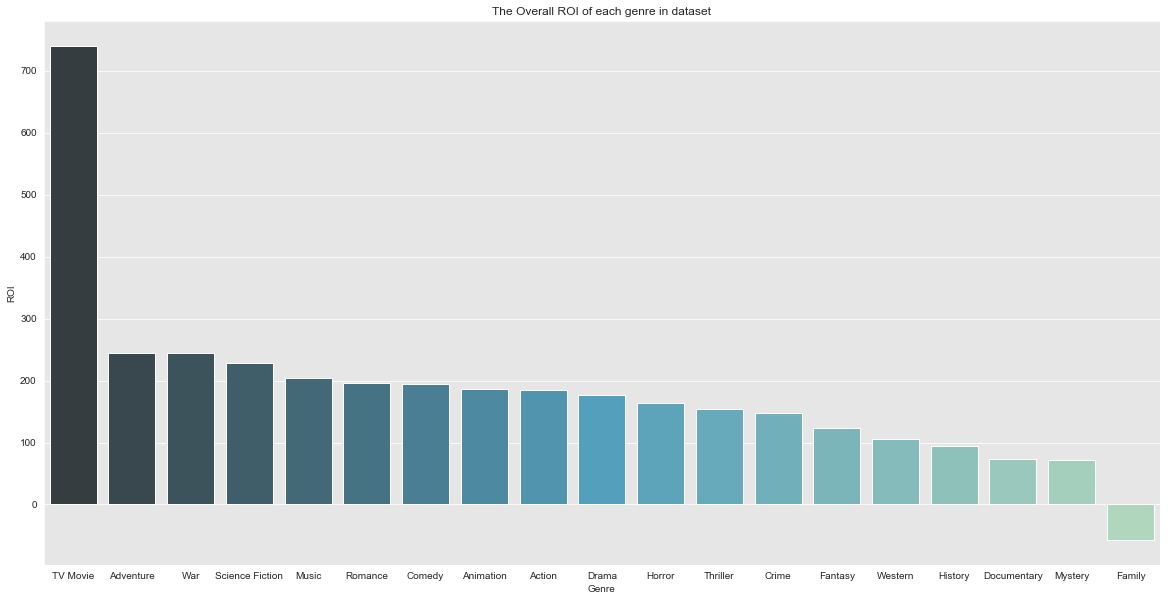

In [43]:
# plot the Revenue of each genre in TMDB data
plt.figure(figsize=[20,10])
sns.barplot(data=genre_roi.sort_values(by='ROI', ascending=False), x='genre', y='ROI',palette="GnBu_d")
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.title('The Overall ROI of each genre in dataset')

In [44]:
 #Create graph that displayes the change of Genre pop, revenue, and ROI per decade 

In [45]:
new_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 0 to 5389
Data columns (total 15 columns):
Unnamed: 0              5210 non-null int64
title                   5210 non-null object
budget                  5210 non-null int64
revenue                 5210 non-null int64
genres                  5210 non-null object
production_countries    5210 non-null object
production_companies    5210 non-null object
adult                   5210 non-null bool
popularity              5210 non-null float64
original_language       5210 non-null object
release_date            5210 non-null datetime64[ns]
runtime                 5210 non-null float64
vote_average            5210 non-null float64
vote_count              5210 non-null int64
Main_Genre              5210 non-null object
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 615.6+ KB


In [46]:
new_movie_df.release_date.head()

0   1996-06-25
1   1999-03-30
2   2003-05-15
3   2003-11-05
4   1985-12-20
Name: release_date, dtype: datetime64[ns]

In [47]:
str(new_movie_df.release_date[0])[:4]

'1996'

In [286]:
years = []
for i in new_movie_df.release_date:
    Date = str(i)
    year = Date[:4]
    year = int(year)
    years.append(year)


In [63]:
new_movie_df['year']=years
new_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 0 to 5389
Data columns (total 16 columns):
Unnamed: 0              5210 non-null int64
title                   5210 non-null object
budget                  5210 non-null int64
revenue                 5210 non-null int64
genres                  5210 non-null object
production_countries    5210 non-null object
production_companies    5210 non-null object
adult                   5210 non-null bool
popularity              5210 non-null float64
original_language       5210 non-null object
release_date            5210 non-null datetime64[ns]
runtime                 5210 non-null float64
vote_average            5210 non-null float64
vote_count              5210 non-null int64
Main_Genre              5210 non-null object
year                    5210 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(5), object(6)
memory usage: 816.3+ KB


In [98]:
first_dec = new_movie_df[new_movie_df.year <= 1924].Main_Genre
second_dec = new_movie_df[(new_movie_df.year >= 1925) & (new_movie_df.year <= 1934) ].Main_Genre
third_dec = new_movie_df[(new_movie_df.year >= 1935) & (new_movie_df.year <= 1944) ].Main_Genre
fourth_dec = new_movie_df[(new_movie_df.year >= 1945) & (new_movie_df.year <= 1954) ].Main_Genre
fifth_dec = new_movie_df[(new_movie_df.year >= 1955) & (new_movie_df.year <= 1964) ].Main_Genre
sixth_dec = new_movie_df[(new_movie_df.year >= 1965) & (new_movie_df.year <= 1974) ].Main_Genre
seventh_dec = new_movie_df[(new_movie_df.year >= 1975) & (new_movie_df.year <= 1984) ].Main_Genre
eighth_dec = new_movie_df[(new_movie_df.year >= 1985) & (new_movie_df.year <= 1994) ].Main_Genre
ninth_dec = new_movie_df[(new_movie_df.year >= 1995) & (new_movie_df.year <= 2004) ].Main_Genre
tenth_dec = new_movie_df[(new_movie_df.year >= 2005) & (new_movie_df.year <= 2014) ].Main_Genre
eleventh_dec = new_movie_df[(new_movie_df.year >= 2015) & (new_movie_df.year <= 2024) ].Main_Genre

#be sure to add .value_counts

In [202]:
top_gen= (list(first_dec)[0],list(second_dec)[0],list(third_dec)[0],list(fourth_dec)[0],list(fifth_dec)[0],list(sixth_dec)[0],list(seventh_dec)[0],list(eighth_dec)[0],list(ninth_dec)[0],list(tenth_dec)[0],list(eleventh_dec)[0])



In [203]:
top_gen

('Drama',
 'Drama',
 'Adventure',
 'Crime',
 'Adventure',
 'Drama',
 'Horror',
 'History',
 'Action',
 'Drama',
 'Comedy')

In [284]:
df = new_movie_df
num = [first_dec.value_counts()[0] ,second_dec.value_counts()[0]  ,third_dec.value_counts()[0] , fourth_dec.value_counts()[0] , fifth_dec.value_counts()[0] , sixth_dec.value_counts()[0] , seventh_dec.value_counts()[0] , eighth_dec.value_counts()[0] , ninth_dec.value_counts()[0] , tenth_dec.value_counts()[0],  eleventh_dec.value_counts()[0]]

num
top_gen

dict = {'num' : num, 'Top_Genre': top_gen}

time_df = pd.DataFrame(dict) 
time_df
index_t = (1914,1925,1935,1945,1955,1965,1975,1985,1995,2005,2015)
time_df['Decade'] = index_t


time_df.drop(['num'], axis=1)



,Top_Genre,Decade
0,Drama,1914
1,Drama,1925
2,Adventure,1935
3,Crime,1945
4,Adventure,1955
5,Drama,1965
6,Horror,1975
7,History,1985
8,Action,1995
9,Drama,2005


In [1134]:
#Single to Franchise based on genre success?
#Decide which initial genres will be most profitable 
#Of the most profitable genres which are best candidates for franchising?


In [1135]:
#pull in new dataset that contains which movies becam franchises and relevant data 
Fran = pd.read_csv('Franchises.csv')


In [1136]:
Fran.head() # note the \n and $ characters that prevent us from calculations 

,Franchise,No . of Mo vie s,Dome stic Box Office,Infl. Adj. Dom. Box Office,World wide Box Office,Fi r s t Y e a r,L a s t Y e a r,No . of Ye ar s
0,Zorro,2.0,"$139,404\n,081","$247,028,2\n54","$375,175,\n336",199\n8,200\n5,7.0
1,Zoolander,2.0,"$74,020,\n943","$103,089,0\n06","$116,129,\n674",200\n1,201\n6,15.0
2,Zombieland,2.0,"$75,590,\n286","$91,816,99\n3","$102,236,\n596",200\n9,201\n9,10.0
3,Zhuo yao ji\n(Monster\nHunt),2.0,"$738,919","$740,653","$721,179,\n406",201\n5,201\n8,3.0
4,Young Guns,2.0,"$88,870,\n054","$194,433,9\n83","$88,870,0\n54",198\n8,199\n0,2.0


In [1137]:
Franchises = Fran.replace('\n','', regex=True) # removes \n values

In [1138]:
Franchises.head()

,Franchise,No . of Mo vie s,Dome stic Box Office,Infl. Adj. Dom. Box Office,World wide Box Office,Fi r s t Y e a r,L a s t Y e a r,No . of Ye ar s
0,Zorro,2.0,"$139,404,081","$247,028,254","$375,175,336",1998,2005,7.0
1,Zoolander,2.0,"$74,020,943","$103,089,006","$116,129,674",2001,2016,15.0
2,Zombieland,2.0,"$75,590,286","$91,816,993","$102,236,596",2009,2019,10.0
3,Zhuo yao ji(MonsterHunt),2.0,"$738,919","$740,653","$721,179,406",2015,2018,3.0
4,Young Guns,2.0,"$88,870,054","$194,433,983","$88,870,054",1988,1990,2.0


In [1139]:
Franchises.columns #column names still contain \n 

Index(['Franchise', 'No\n. of\nMo\nvie\ns', 'Dome\nstic\nBox\nOffice',
       'Infl.\nAdj.\nDom.\nBox\nOffice', 'World\nwide\nBox\nOffice',
       'Fi\nr\ns\nt\nY\ne\na\nr', 'L\na\ns\nt\nY\ne\na\nr',
       'No\n.\nof\nYe\nar\ns'],
      dtype='object')

In [1140]:
# rename each column 
Franchises.rename(columns={'Franchise':'Franchises', 'No\n. of\nMo\nvie\ns':'No. of Movies', 'Dome\nstic\nBox\nOffice':'Domestic Box Office',
       'Infl.\nAdj.\nDom.\nBox\nOffice':'Infl. Adj. Dom. Box Office', 'World\nwide\nBox\nOffice':'World Wide Box Office',
       'Fi\nr\ns\nt\nY\ne\na\nr':'First Year', 'L\na\ns\nt\nY\ne\na\nr':'Last Year',
       'No\n.\nof\nYe\nar\ns':'No. of Years'}, 
                 inplace=True)

In [1522]:
Franchises.head()

,Franchises,No. of Movies,Domestic Box Office,Infl. Adj. Dom. Box Office,World Wide Box Office,First Year,Last Year,No. of Years
0,Zorro,2.0,"$139,404,081","$247,028,254","$375,175,336",1998,2005,7.0
1,Zoolander,2.0,"$74,020,943","$103,089,006","$116,129,674",2001,2016,15.0
2,Zombieland,2.0,"$75,590,286","$91,816,993","$102,236,596",2009,2019,10.0
3,Zhuo yao ji(MonsterHunt),2.0,"$738,919","$740,653","$721,179,406",2015,2018,3.0
4,Young Guns,2.0,"$88,870,054","$194,433,983","$88,870,054",1988,1990,2.0


In [1142]:
#removes movies that do not contain how much a movie made during it time in theaters 
Fran_df = Franchises[(Franchises['Domestic Box Office'] != '$0') & (Franchises['Infl. Adj. Dom. Box Office'] != '$0')]


In [1143]:
Fran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1306
Data columns (total 8 columns):
Franchises                    977 non-null object
No. of Movies                 892 non-null float64
Domestic Box Office           1051 non-null object
Infl. Adj. Dom. Box Office    1032 non-null object
World Wide Box Office         1067 non-null object
First Year                    1093 non-null object
Last Year                     1093 non-null object
No. of Years                  816 non-null float64
dtypes: float64(2), object(6)
memory usage: 80.6+ KB


In [1144]:
#drops na containing rows from specified columns
Fran_clean = Fran_df.dropna(axis=0, subset=['Domestic Box Office','Infl. Adj. Dom. Box Office','Franchises'])

In [1145]:
Fran_clean.head()

,Franchises,No. of Movies,Domestic Box Office,Infl. Adj. Dom. Box Office,World Wide Box Office,First Year,Last Year,No. of Years
0,Zorro,2.0,"$139,404,081","$247,028,254","$375,175,336",1998,2005,7.0
1,Zoolander,2.0,"$74,020,943","$103,089,006","$116,129,674",2001,2016,15.0
2,Zombieland,2.0,"$75,590,286","$91,816,993","$102,236,596",2009,2019,10.0
3,Zhuo yao ji(MonsterHunt),2.0,"$738,919","$740,653","$721,179,406",2015,2018,3.0
4,Young Guns,2.0,"$88,870,054","$194,433,983","$88,870,054",1988,1990,2.0


In [1146]:
#removes $ character 
Fran_clean['Domestic Box Office'] = Fran_clean['Domestic Box Office'].str.replace('$', '')
Fran_clean['Infl. Adj. Dom. Box Office'] = Fran_clean['Infl. Adj. Dom. Box Office'].str.replace('$', '')
Fran_clean['World Wide Box Office'] = Fran_clean['World Wide Box Office'].str.replace('$', '')




In [1147]:
Fran_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 0 to 1304
Data columns (total 8 columns):
Franchises                    945 non-null object
No. of Movies                 892 non-null float64
Domestic Box Office           945 non-null object
Infl. Adj. Dom. Box Office    945 non-null object
World Wide Box Office         945 non-null object
First Year                    945 non-null object
Last Year                     945 non-null object
No. of Years                  816 non-null float64
dtypes: float64(2), object(6)
memory usage: 66.4+ KB


In [1148]:
#removes commas in order to perform calculations 
Fran_clean['Domestic Box Office'] = Fran_clean['Domestic Box Office'].str.replace(',', '').astype(float)
Fran_clean['Infl. Adj. Dom. Box Office'] = Fran_clean['Infl. Adj. Dom. Box Office'].str.replace(',', '').astype(float)
Fran_clean['World Wide Box Office'] = Fran_clean['World Wide Box Office'].str.replace(',', '').astype(float)


In [1149]:
Clean_Fran_df = Fran_clean 

In [1150]:
Clean_Fran_df.head()

,Franchises,No. of Movies,Domestic Box Office,Infl. Adj. Dom. Box Office,World Wide Box Office,First Year,Last Year,No. of Years
0,Zorro,2.0,139404081.0,247028254.0,375175336.0,1998,2005,7.0
1,Zoolander,2.0,74020943.0,103089006.0,116129674.0,2001,2016,15.0
2,Zombieland,2.0,75590286.0,91816993.0,102236596.0,2009,2019,10.0
3,Zhuo yao ji(MonsterHunt),2.0,738919.0,740653.0,721179406.0,2015,2018,3.0
4,Young Guns,2.0,88870054.0,194433983.0,88870054.0,1988,1990,2.0


In [1151]:
Clean_Fran_df.isna().any()

Franchises                    False
No. of Movies                  True
Domestic Box Office           False
Infl. Adj. Dom. Box Office    False
World Wide Box Office         False
First Year                    False
Last Year                     False
No. of Years                   True
dtype: bool

In [1152]:
# removes na values 
Final_df = Clean_Fran_df.dropna()

In [1153]:
Final_df.shape

(816, 8)

In [1155]:
# Here I use the first data set to add any information to my new dataset 
Merge_df = pd.merge(Final_df,new_movie_df[['title','Main_Genre']], 
         how = 'left', left_on = "Franchises", right_on = 'title').drop('title',axis=1)

In [1519]:
#manually adding Franchise genres to movies that are still left Nan values 
Merge_df['Main_Genre'][219] = 'Drama' #'Fantasy' 'Drama' 'Action' 'Adventure' 'Horror' 'Documentary' 'Crime' 'Dance'


In [1524]:
Merge_df.head()

,Franchises,No. of Movies,Domestic Box Office,Infl. Adj. Dom. Box Office,World Wide Box Office,First Year,Last Year,No. of Years,Main_Genre
0,Zorro,2.0,139404081.0,247028254.0,375175336.0,1998,2005,7.0,Action
1,Zoolander,2.0,74020943.0,103089006.0,116129674.0,2001,2016,15.0,Comedy
2,Zombieland,2.0,75590286.0,91816993.0,102236596.0,2009,2019,10.0,Comedy
3,Zhuo yao ji(MonsterHunt),2.0,738919.0,740653.0,721179406.0,2015,2018,3.0,Adventure
4,Young Guns,2.0,88870054.0,194433983.0,88870054.0,1988,1990,2.0,Crime


Text(0.5, 1.0, 'Box Office Returns vs Franchised Genre')

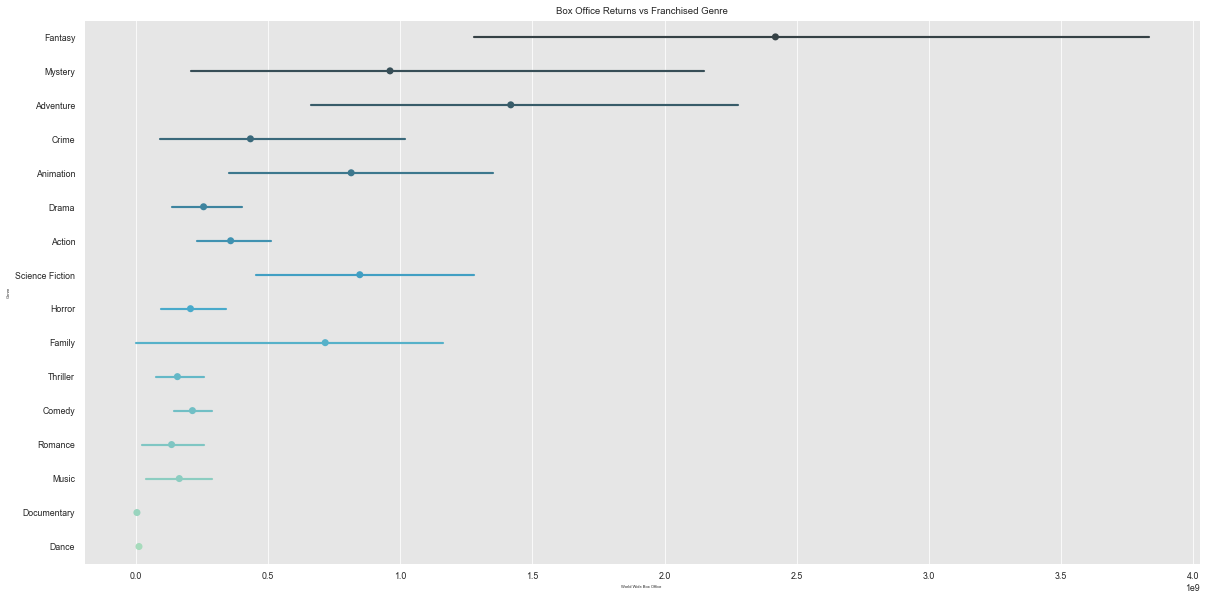

In [1631]:
#plotting graph that displayes which genres do better when franchised 
plt.figure(figsize=[20,10])
sns.pointplot(data=Merge_df.sort_values(by='World Wide Box Office', ascending= False), x='World Wide Box Office', y='Main_Genre',palette="GnBu_d")
plt.xlabel('World Wide Box Office')
plt.ylabel('Genre')
plt.title('Box Office Returns vs Franchised Genre')

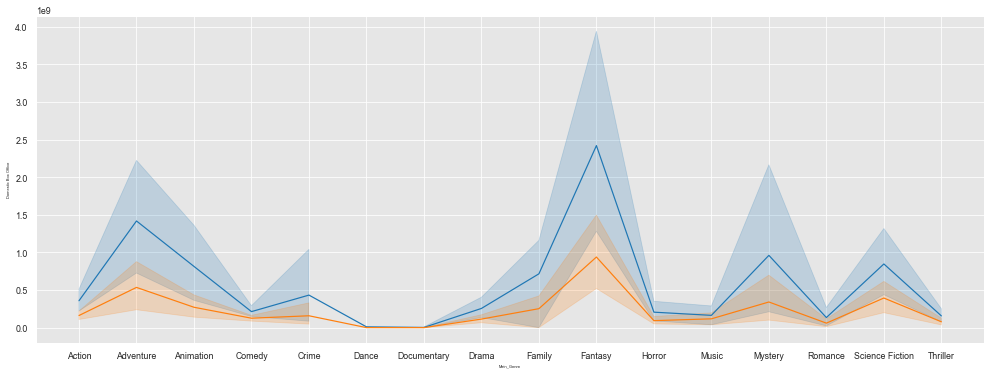

In [1622]:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
world_rev =Merge_df.sort_values(['World Wide Box Office'])

fig, ax = plt.subplots(figsize=(17,6))
sns.set_context("paper", font_scale=1, rc={"font.size":10,"axes.labelsize":4})

# Create violinplot
sns.lineplot(y = Merge_df["World Wide Box Office"], x = Merge_df['Main_Genre'], data= world_rev, ax=ax)
sns.lineplot(y = Merge_df["Domestic Box Office"], x = Merge_df['Main_Genre'], data= world_rev, ax=ax)


# Show the plot
plt.show()